# Package

In [1]:
# package
import pandas as pd
import re
import missingno as msn
from datetime import datetime

# Import dataset

In [2]:
# Import dataset
df = pd.read_csv("SuperStore_Sales.csv")
df.shape

(5901, 23)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


# Rename column headers

In [4]:
df.columns = (df.columns.str.strip().str.lower().str.replace(" ", "_"))
df.columns

Index(['row_id+o6g3a1:r6', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'region', 'product_id', 'category', 'sub-category', 'product_name',
       'sales', 'quantity', 'profit', 'returns', 'payment_mode', 'ind1',
       'ind2'],
      dtype='object')

# Handling missing values

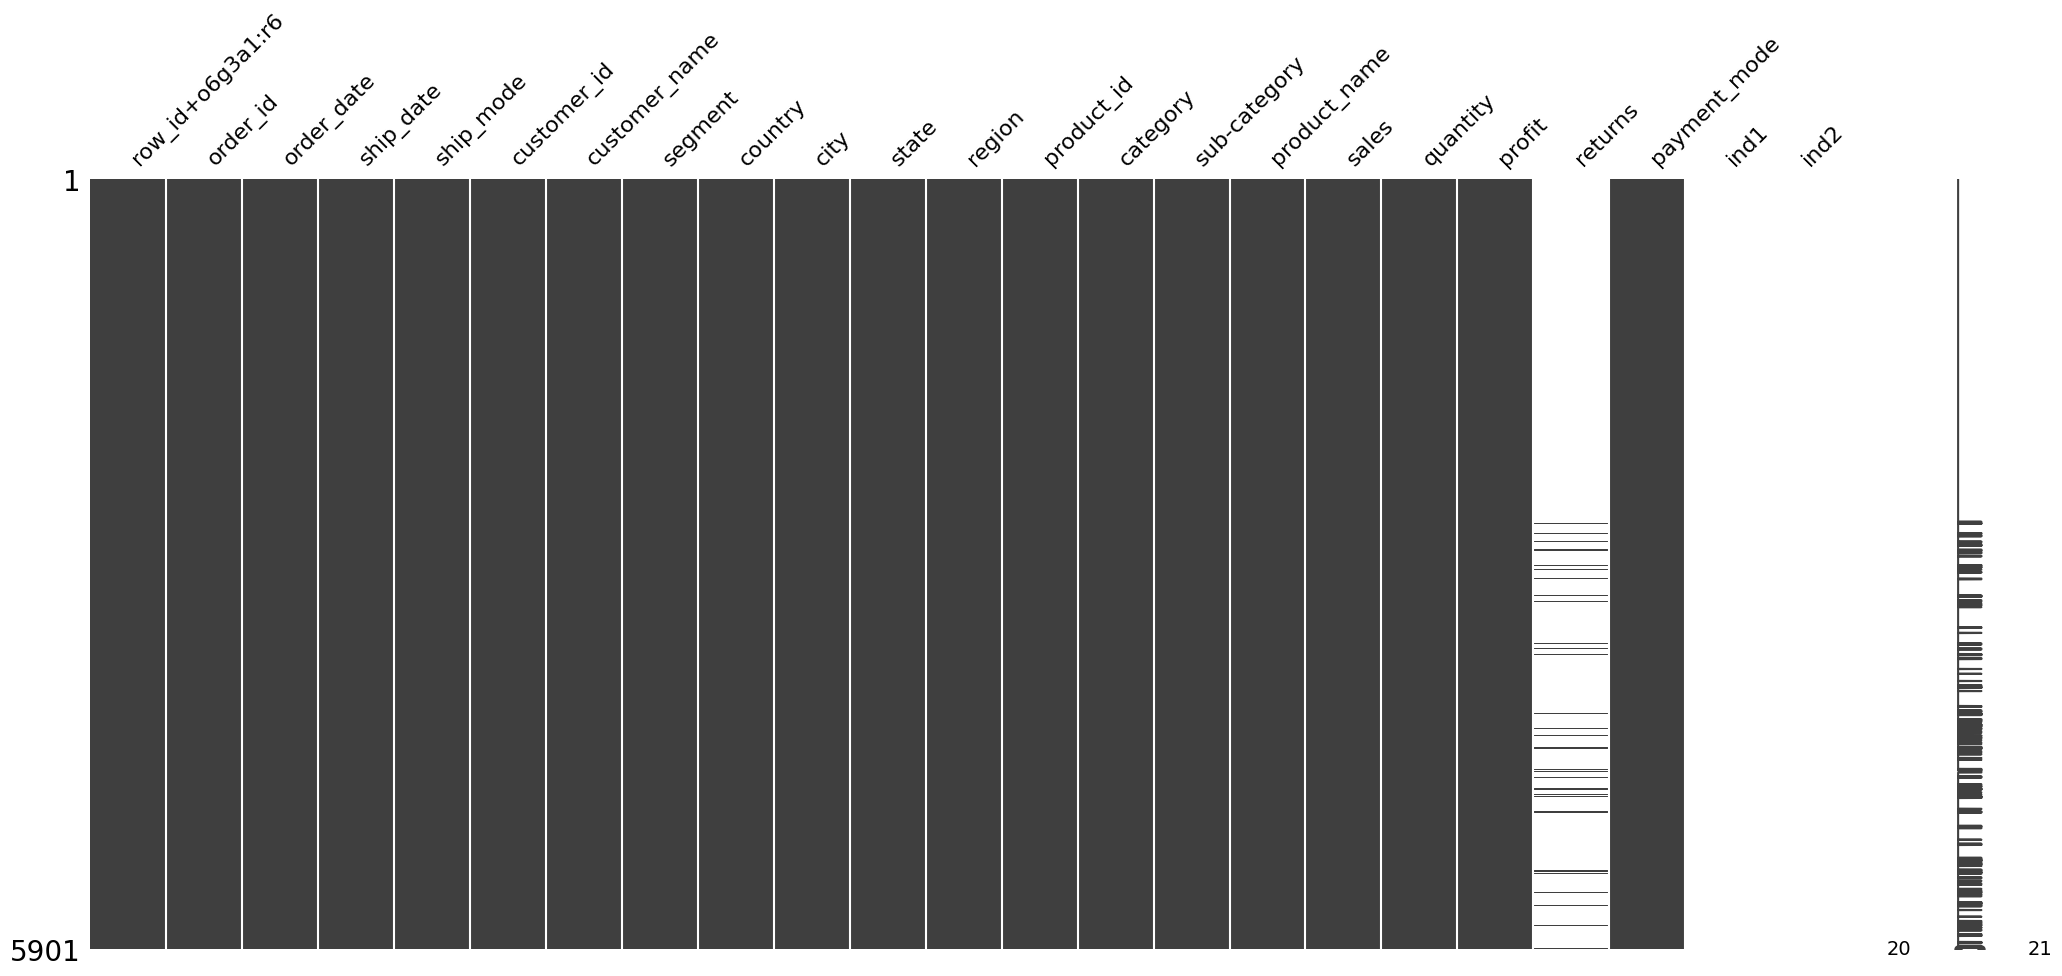

In [5]:
msn.matrix(df);

In [6]:
df.isnull().sum()

row_id+o6g3a1:r6       0
order_id               0
order_date             0
ship_date              0
ship_mode              0
customer_id            0
customer_name          0
segment                0
country                0
city                   0
state                  0
region                 0
product_id             0
category               0
sub-category           0
product_name           0
sales                  0
quantity               0
profit                 0
returns             5614
payment_mode           0
ind1                5901
ind2                5901
dtype: int64

In [7]:
df.drop(['ind1','ind2'], axis=1, inplace=True)
df.rename(columns={'row_id+o6g3a1:r6': 'row_id'}, inplace=True)
df['returns'] = df['returns'].fillna("NO")

In [8]:
df['returns'] = df['returns'].replace(1, 'YES')

# Removing duplicate

In [9]:
#Check for duplicate rows
duplicate_rows = df.duplicated()

# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

print("Shape of DataFrame Before Removing Duplicates: ", df.shape)

# Drop the duplicates
df = df.drop_duplicates()

# Checking the shape of the data after dropping duplicates
print("Shape of DataFrame After Removing Duplicates: ", df.shape)

Number of duplicate rows: 0
Shape of DataFrame Before Removing Duplicates:  (5901, 21)
Shape of DataFrame After Removing Duplicates:  (5901, 21)


# Convert date formats

In [10]:
df["order_date"] = pd.to_datetime(df["order_date"],dayfirst=True)
df["ship_date"] = pd.to_datetime(df["ship_date"],dayfirst=True)

# Export dataset

In [11]:
df.to_csv("cleaned_superstore_sale.csv", index=False, encoding="utf-8")